In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
main_data = datasets.load_breast_cancer()
print(main_data)
print("\n\nShapes of data feature and target\n")
print(main_data.data.shape)
print(main_data.target.shape)
print(main_data.feature_names)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [3]:
import seaborn as sns

['malignant' 'benign']


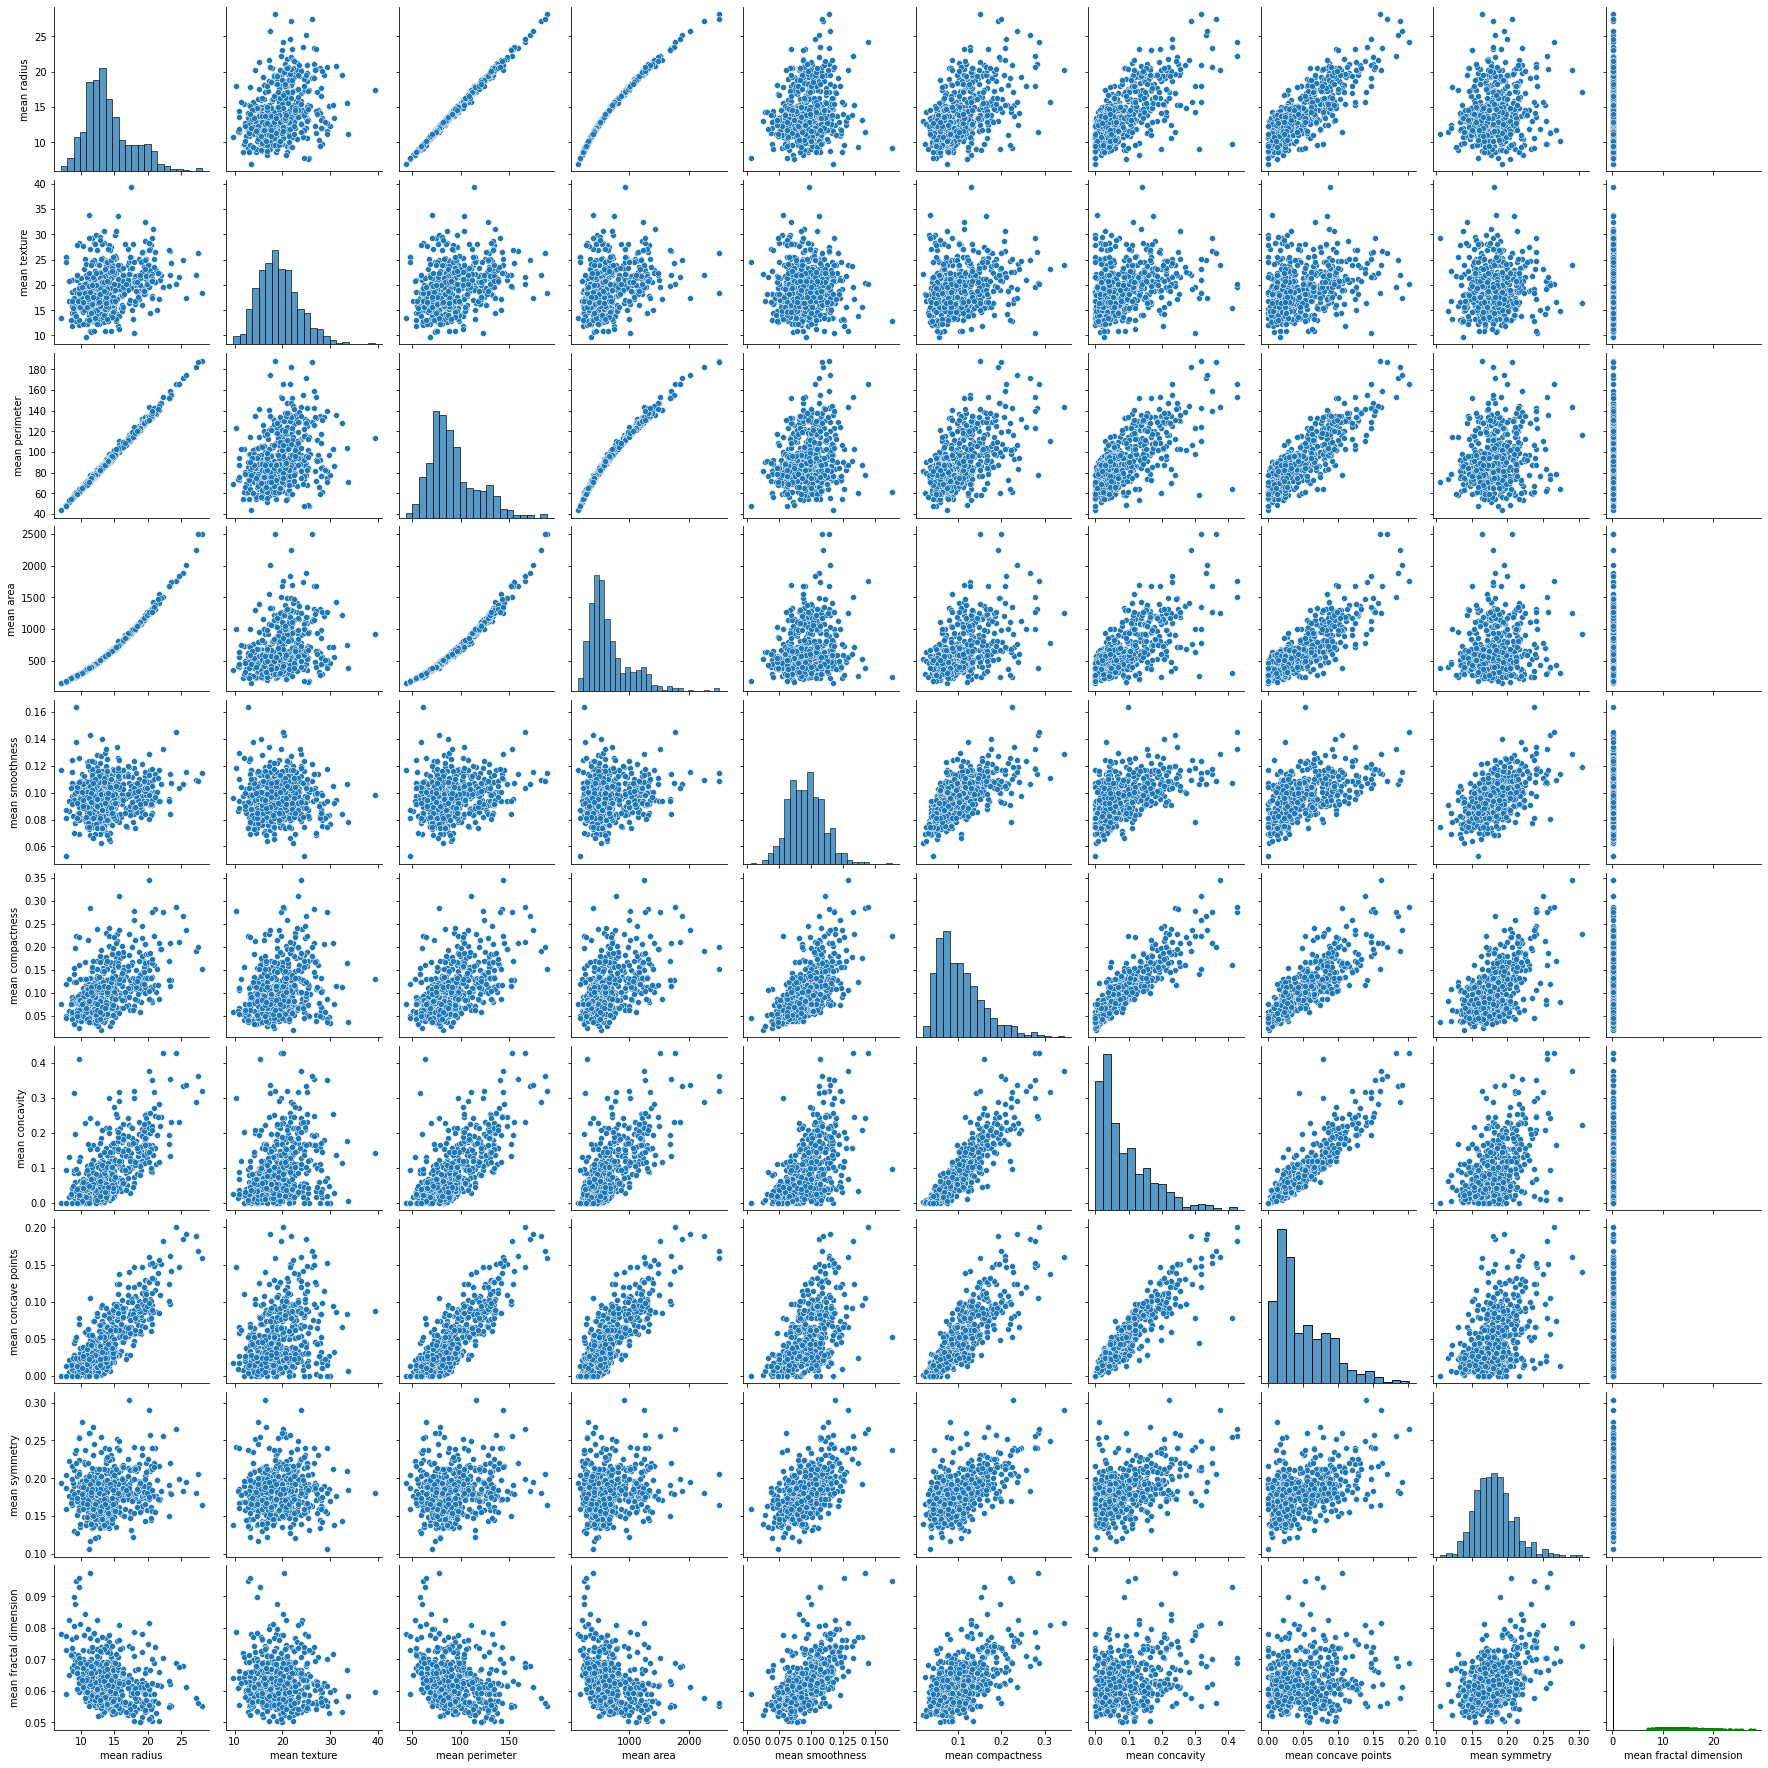

In [4]:
df = pd.DataFrame(main_data.data, columns = main_data.feature_names)
df['class'] = main_data.target
sns.color_palette("husl", 8)
sns.pairplot(df.iloc[:, : 10])
# targets 
# 0 = benign
# 1 = malignant
print(main_data.target_names)
plt.scatter(main_data.data[:, 0], main_data.target, c = 'green', marker='.')
plt.xlabel('Features')
plt.ylabel('Type of Cancer')
plt.show()

[1 1 1 0 1 2 1 2 2 2 2 2 1 2 2 2 2 1 3 2 0 0 2 3 1 1 2 1 2 1 1 2 1 1 2 2 2
 0 2 2 2 0 1 2 2 1 0 2 0 2 0 2 0 1 2 0 1 2 0 0 0 0 2 0 2 2 0 0 0 0 1 0 1 2
 0 2 0 1 1 0 0 0 3 1 0 1 2 1 0 2 2 2 2 2 2 1 0 0 0 2 2 0 0 0 0 2 0 0 3 0 0
 0 2 0 0 0 0 2 2 1 0 1 3 2 0 2 2 1 2 1 0 2 2 2 1 0 0 0 2 0 0 2 0 0 0 0 0 2
 2 2 0 0 0 0 2 0 1 2 0 0 0 1 1 0 3 2 0 1 1 2 0 2 2 0 0 0 0 2 0 0 3 1 2 0 2
 0 1 0 0 0 2 0 0 2 2 0 2 1 1 2 0 1 1 2 0 2 0 2 0 2 1 0 3 2 2 2 0 0 1 3 2 2
 0 2 2 2 0 2 0 2 2 0 0 1 0 2 3 1 2 1 2 0 0 2 1 0 0 0 0 0 1 0 1 1 1 2 1 2 2
 2 1 1 1 2 1 3 0 2 0 0 2 0 3 0 1 0 0 1 2 2 1 0 1 2 0 0 0 0 0 0 2 2 0 0 0 2
 0 0 2 0 1 0 1 0 0 0 0 0 2 2 0 2 0 0 0 0 0 1 0 0 0 1 0 1 0 0 2 0 2 2 2 0 0
 0 0 1 0 1 0 3 2 0 0 1 0 0 0 2 0 0 0 2 3 2 0 0 0 2 0 0 0 0 0 2 2 1 1 0 3 3
 2 2 1 1 2 2 0 2 2 0 0 0 0 0 0 2 0 2 0 1 0 0 1 1 0 2 2 0 0 0 1 0 0 0 0 0 2
 0 1 0 0 0 0 2 2 0 0 1 0 0 0 2 0 2 0 0 0 0 0 0 2 0 1 1 2 2 0 2 2 2 0 1 2 0
 1 0 1 2 2 1 0 1 0 2 0 2 0 0 0 0 1 3 2 0 2 2 2 0 1 0 0 0 2 0 0 0 2 2 0 2 0
 2 2 2 2 0 2 1 0 2 0 1 1 

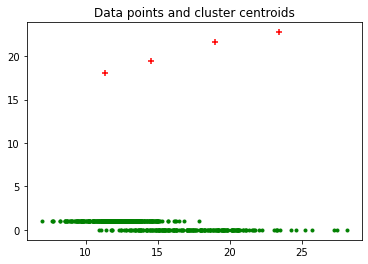

In [5]:
kmeans = KMeans(n_clusters = 4, random_state = 54)
# prediction
prediction = kmeans.fit_predict(main_data.data)
print(prediction)
# shapes of clusters
print("\n\nshapes of clustering!!!!\n\n")
print(kmeans.cluster_centers_.shape)
print("\n\nclusters\n\n")
print(kmeans.cluster_centers_)
plt.scatter(main_data.data[:, 0], main_data.target, c = 'green', marker = '.')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'red', marker = '+')
plt.title('Data points and cluster centroids')
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Text(91.68, 0.5, 'predicted label')

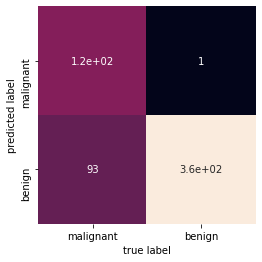

In [8]:
from scipy.stats import mode
labels = np.zeros_like(prediction)
print(labels)
for _ in range(10):
  temp = (prediction == _)
  labels[temp] = mode(main_data.target[temp])[0]
  print("print mode[0]", mode(main_data.target[temp])[0])
  print(labels[temp])
print(labels)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(main_data.target, labels)
"""## 83.47% Accuracy"""
mat = confusion_matrix(main_data.target, labels)
ax = sns.heatmap(mat.T, square = True, annot = True, cbar = False, xticklabels = main_data.target_names, yticklabels = main_data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')